# Investigating Netflix Movies

            type  title           director  \
show_id                                      
s1       TV Show     3%                NaN   
s2         Movie   7:19  Jorge Michel Grau   
s3         Movie  23:59       Gilbert Chan   
s4         Movie      9        Shane Acker   
s5         Movie     21     Robert Luketic   

                                                      cast        country  \
show_id                                                                     
s1       João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
s2       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
s3       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
s4       Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
s5       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

                date_added  release_year  duration  \
show_id                                              
s1         August 14, 2020   

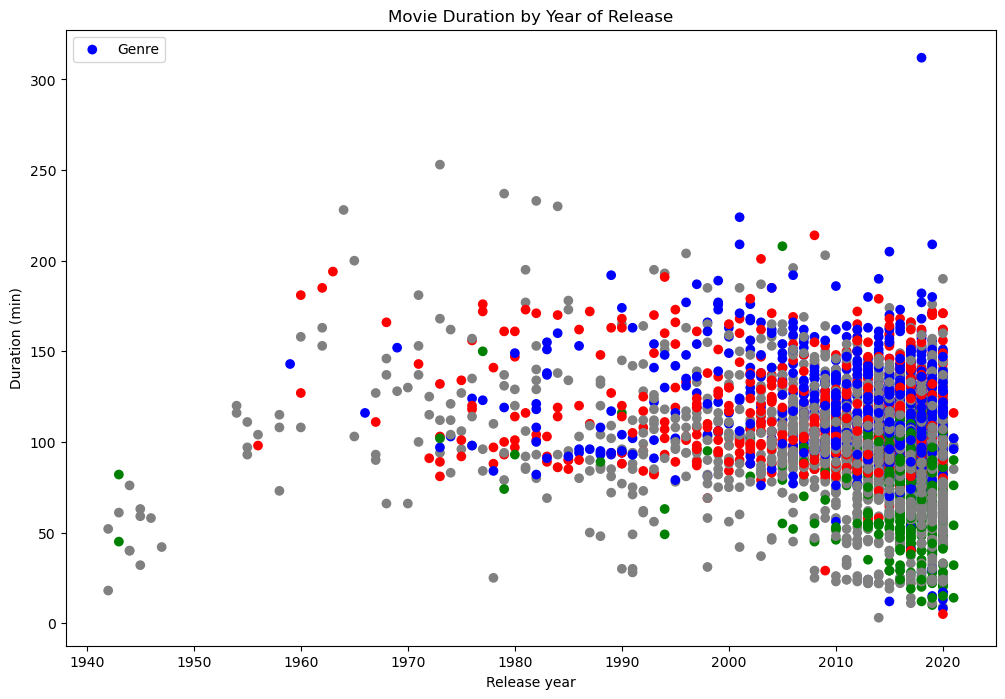

In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Reading the Netflix data from a CSV file and setting the first column as the index
netflix_df = pd.read_csv("netflix_data.csv", index_col=0)

# Displaying the first few rows of the dataframe and its shape
print(netflix_df.head())
print(netflix_df.shape)

# Creating a subset of the dataframe containing only movies
netflix_subset = netflix_df[netflix_df["type"] == "Movie"]

# Displaying the first few rows of the movie subset
print(netflix_subset.head())

# Selecting specific columns for the movie subset
netflix_movies = netflix_subset[['title', 'country', 'genre', 'release_year', 'duration']]

# Displaying the first few rows of the movie dataframe
print(netflix_movies.head())

# Creating a subset of movies with duration less than 60 minutes
short_movies = netflix_movies[netflix_movies['duration'] < 60]

# Displaying the first 20 rows of short duration movies
print(short_movies.head(20))

# Extracting the 'genre' column for color-coding in the scatter plot
print(netflix_movies[['genre']])
colors = []

# Assigning colors based on genres
for _, row in netflix_movies.iterrows():
    genre = row['genre']
    if genre == "Dramas":
        colors.append('blue')
    elif genre == "Documentaries":
        colors.append("green")
    elif genre == "Horror Movies":
        colors.append("red")
    elif genre == "Action":
        colors.append("red")
    else:
        colors.append("gray")

# Creating a scatter plot for movie duration by year of release
fig = plt.figure(figsize=(12, 8))
release_years = netflix_movies["release_year"]
durations = netflix_movies["duration"]
plt.scatter(release_years, durations, c=colors, label='Genre')

# Adding labels and title to the plot
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')

# Displaying the legend for the genres
plt.legend()

# Showing the plot
plt.show()
